Forecast Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots as tsa_plots
warnings.filterwarnings("ignore")

In [5]:
 df=pd.read_excel("/content/Airlines+Data.xlsx")
 df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [6]:
df.set_index(["Month"],drop=True,inplace=True)

In [7]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [8]:
df.isnull().sum()

Passengers    0
dtype: int64

In [9]:
df.duplicated().sum()

16

In [10]:
df.shape

(96, 1)

In [11]:
df.dtypes

Passengers    int64
dtype: object

In [12]:
df.reset_index(inplace=True)

In [13]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [14]:
df.Month=pd.to_datetime(df.Month)

In [15]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [16]:
df.set_index(["Month"],drop=True,inplace=True)

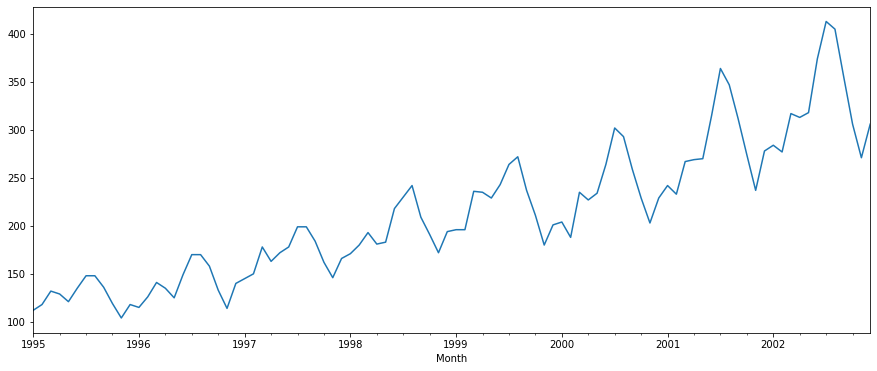

In [18]:
df['Passengers'].plot(figsize=(15, 6))
plt.show()

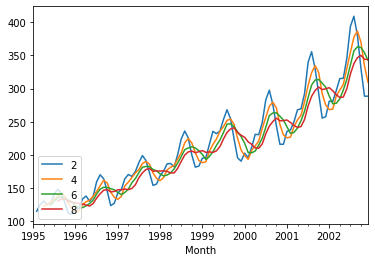

In [20]:
for i in range(2,10,2):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)
plt.show()

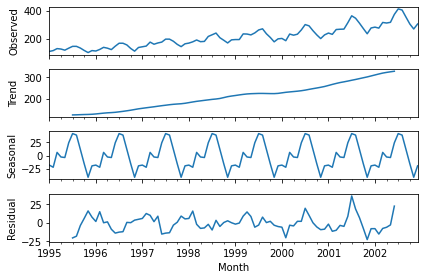

In [21]:
ts_add = seasonal_decompose(df['Passengers'],model="additive")
fig = ts_add.plot()
plt.show()

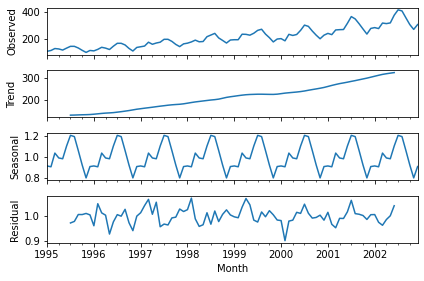

In [22]:
ts_mul = seasonal_decompose(df.Passengers,model="multiplicative")
fig = ts_mul.plot()
plt.show()

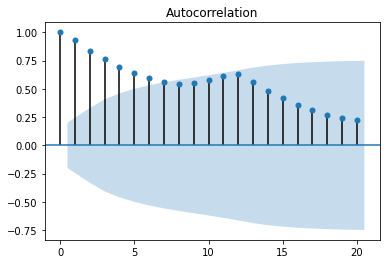

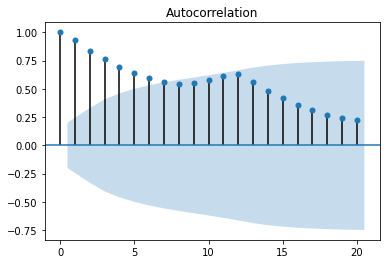

In [24]:
tsa_plots.plot_acf(df['Passengers'])

## ARIMA

In [26]:
X=df.Passengers.values

In [27]:
size = int(len(X) * 0.66)

In [28]:
train, test = X[0:size], X[size:len(X)]

In [29]:
model = ARIMA(train, order=(5,1,0))

In [30]:
model_fit = model.fit(disp=0)

In [32]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Sat, 16 Oct 2021   AIC                            539.817
Time:                        16:45:00   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.241      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.501      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

In [33]:
residuals = pd.DataFrame(model_fit.resid)

In [34]:
print(residuals.describe())

               0
count  62.000000
mean    0.057354
std    16.895802
min   -34.303295
25%   -12.610649
50%    -1.589477
75%    12.565606
max    39.955360


## Rolling Forecast ARIMA Model

In [35]:
history = [x for x in train]

In [36]:
predictions = []

In [37]:
for i in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[i]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=239.755196, expected=227.000000
predicted=220.737311, expected=234.000000
predicted=237.815015, expected=264.000000
predicted=252.750575, expected=302.000000
predicted=306.715777, expected=293.000000
predicted=285.374653, expected=259.000000
predicted=250.264011, expected=229.000000
predicted=227.093114, expected=203.000000
predicted=211.011442, expected=229.000000
predicted=253.260277, expected=242.000000
predicted=252.490692, expected=233.000000
predicted=234.042128, expected=267.000000
predicted=268.773634, expected=269.000000
predicted=261.782254, expected=270.000000
predicted=271.798050, expected=315.000000
predicted=314.422119, expected=364.000000
predicted=368.637725, expected=347.000000
predicted=334.957879, expected=312.000000
predicted=301.161832, expected=274.000000
predicted=265.936449, expected=237.000000
predicted=244.037190, expected=278.000000
predicted=312.961772, expected=284.000000
predicted=291.748155, expected=277.000000
predicted=284.551875, expected=317

In [38]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 782.495


## MULTIPLE MODELS

In [96]:
df1=pd.read_excel("/content/Airlines+Data.xlsx")

In [97]:
df1.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [98]:
df1['month'] = pd.DatetimeIndex(df1['Month']).month

In [99]:
df1.head()

,Month,Passengers,month
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5


In [101]:
df1.month=df1.month.apply(lambda x: str(x) + " Month")

In [102]:
df1.head()

,Month,Passengers,month
0,1995-01-01,112,1 Month Month
1,1995-02-01,118,2 Month Month
2,1995-03-01,132,3 Month Month
3,1995-04-01,129,4 Month Month
4,1995-05-01,121,5 Month Month


In [103]:
df1 = pd.get_dummies(df1, columns = ['month'])

In [104]:
df1.drop("Month",axis=1,inplace=True)

In [105]:
df1

,Passengers,month_1 Month Month,month_10 Month Month,month_11 Month Month,month_12 Month Month,month_2 Month Month,month_3 Month Month,month_4 Month Month,month_5 Month Month,month_6 Month Month,month_7 Month Month,month_8 Month Month,month_9 Month Month
0,112,1,0,0,0,0,0,0,0,0,0,0,0
1,118,0,0,0,0,1,0,0,0,0,0,0,0
2,132,0,0,0,0,0,1,0,0,0,0,0,0
3,129,0,0,0,0,0,0,1,0,0,0,0,0
4,121,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,0,0,0,0,0,0,0,0,0,1,0
92,355,0,0,0,0,0,0,0,0,0,0,0,1
93,306,0,1,0,0,0,0,0,0,0,0,0,0
94,271,0,0,1,0,0,0,0,0,0,0,0,0


In [106]:
df1.shape

(96, 13)

In [107]:
t= np.arange(1,97)

In [108]:
df1['t'] = t

In [109]:
df1['t_sq'] = df1['t']*df1['t']
log_Passengers=np.log(df1['Passengers'])
df1['log_Passengers']=log_Passengers

In [110]:
df1.head()

,Passengers,month_1 Month Month,month_10 Month Month,month_11 Month Month,month_12 Month Month,month_2 Month Month,month_3 Month Month,month_4 Month Month,month_5 Month Month,month_6 Month Month,month_7 Month Month,month_8 Month Month,month_9 Month Month,t,t_sq,log_Passengers
0,112,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,0,1,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,1,0,0,0,0,0,0,3,9,4.882802
3,129,0,0,0,0,0,0,1,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,1,0,0,0,0,5,25,4.795791


In [128]:
df1.columns=['Passengers','Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9', 't', 't_sq', 'log_Passengers']

In [129]:
df1.columns

Index(['Passengers', 'Month_1', 'Month_10', 'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8',
       'Month_9', 't', 't_sq', 'log_Passengers'],
      dtype='object')

In [130]:
train1, test1 = np.split(df1, [int(.67 *len(df1))])

In [131]:
linear= smf.ols('Passengers ~ t',data=train1).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test1['t'])))
rmselin=np.sqrt((np.mean(np.array(test1['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [140]:
addlinear= smf.ols('Passengers~ t+Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test1[['t','Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

34.26029387076413

In [132]:
quad=smf.ols('Passengers~t+t_sq',data=train1).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test1[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predquad))**2))
rmsequad

53.1895551441541

In [133]:
expo=smf.ols('Passengers~t',data=train1).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test1['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [134]:
additive= smf.ols('Passengers~ Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test1[['Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']])))
rmseadd=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651412

In [135]:
addquad=smf.ols('Passengers~t+t_sq+Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test1[['t','t_sq','Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']])))
rmseaddquad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.5035040385881

In [136]:
mulsea=smf.ols('log_Passengers~Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test1[['Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']])))
rmsemul= np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585921

In [137]:
mullin= smf.ols('log_Passengers~t+Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test1[['t','Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']])))
rmsemulin=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

12.759135120294594

In [138]:
mul_quad= smf.ols('log_Passengers~t+t_sq+Month_1+Month_10+Month_11+Month_12+Month_2+Month_3+Month_4+Month_5+Month_6+Month_7+Month_8+Month_9',data=train1).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test1[['t','t_sq','Month_1', 'Month_10',
       'Month_11', 'Month_12', 'Month_2',
       'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8',
       'Month_9']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test1['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.25957879077209

## CONCLUSION

In [141]:
output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [142]:
rmse=pd.DataFrame(output)

In [143]:
rmse

,Model,Values
0,rmse_mul_quad,2.825958e+01
1,rmseadd,1.239494e+02
2,rmseaddlinear,3.426029e+01
3,rmseaddquad,3.450350e+01
4,rmseexpo,1.603095e+128
5,rmselin,2.550398e+01
6,rmsemul,1.278369e+02
7,rmsemulin,1.275914e+01
8,rmsequad,5.318956e+01


In [147]:
rmse[rmse.Values==rmse.min()[1]]

,Model,Values
7,rmsemulin,12.759135


## Multiplicative seasonality with linear trend has the best RMSE value